In [ ]:
#Keras: slower than MLPRegressor. But provides CNN, RNN
#Kaggle:

In [10]:
#TRAIN A NEURAL NET IN KERAS(mmost used deep learning framework)
import keras
from keras.utils import train_test_split
from keras.models import Sequential #Build a neural network layer by layer
from keras.layers import Dense, Activation  #Dense=fully-connected
#Dense means every node is connected to every other node, fully-connected layer.
#Activations to specify activation functions
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

ImportError: cannot import name 'train_test_split' from 'keras.utils' (/Users/psabnac/Library/Python/3.9/lib/python/site-packages/keras/utils/__init__.py)

In [8]:
RealEstate = pd.read_csv("RealEstate.csv")
RealEstate.head()
RealEstate.shape

(414, 8)

In [22]:
#INPUT AND OUPUT FEATURES & SPLIT INTO TRAINING/TESTING SETS
X = RealEstate.iloc[:,2:-1] #input features/predictores
Y = RealEstate.iloc[:,-1:] #output feature
Y = np.ravel(Y)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [23]:
model = Sequential()

#First hidden layer:  
model.add(Dense(100, #units
                input_dim=X_train.shape[1], #receiving an input
                activation="relu")) #Activation function election

#Second hidden layer
model.add(Dense(100, 
                activation="relu"))

#Third hidden layer
model.add(Dense(1)) #Last fully-connected layer is an only node

model.compile(loss="mse", 
              optimizer=keras.optimizers.Adam(learning_rate=0.001), 
              metrics=["mae", "mse"])#Gives them for every single epoche
history=model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
10/10 [==============================] - 1s 5ms/step - loss: 11215.7275 - mae: 70.4522 - mse: 11215.7275
Epoch 2/300
10/10 [==============================] - 0s 4ms/step - loss: 1725.4373 - mae: 34.9129 - mse: 1725.4373
Epoch 3/300
10/10 [==============================] - 0s 6ms/step - loss: 644.1065 - mae: 19.9083 - mse: 644.1065
Epoch 4/300
10/10 [==============================] - 0s 4ms/step - loss: 302.4785 - mae: 13.9915 - mse: 302.4785
Epoch 5/300
10/10 [==============================] - 0s 4ms/step - loss: 110.0518 - mae: 7.6366 - mse: 110.0518
Epoch 6/300
10/10 [==============================] - 0s 4ms/step - loss: 110.5739 - mae: 7.7079 - mse: 110.5739
Epoch 7/300
10/10 [==============================] - 0s 5ms/step - loss: 95.7840 - mae: 6.9469 - mse: 95.7840
Epoch 8/300
10/10 [==============================] - 0s 4ms/step - loss: 90.6309 - mae: 6.5976 - mse: 90.6309
Epoch 9/300
10/10 [==============================] - 0s 6ms/step - loss: 89.5374 - mae: 6.5326 - m

In [24]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 0s 4ms/step - loss: 56.9843 - mae: 5.9854 - mse: 56.9843


[56.984291076660156, 5.9854350090026855, 56.984291076660156]

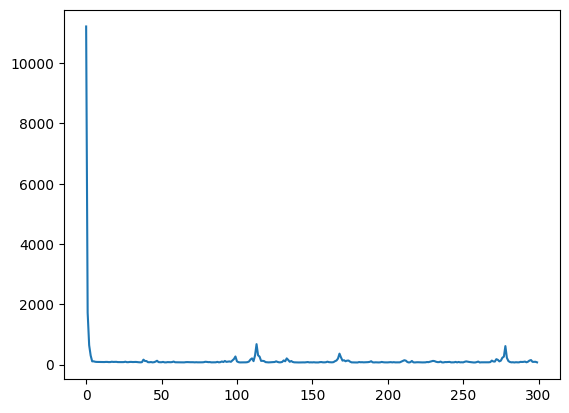

In [26]:
plt.plot(history.history['loss'])

In [ ]:
keras.backend.clear_session()